# Q6

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [2]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  # Reflect101: gfedcb|abcdefgh|gfedcb
  
  #######################
  #    your code here   #
  img_width, img_height = img.shape
  filter_width, filter_height = filter_size, filter_size
  horizontal_padding = filter_width // 2
  vertical_padding = filter_height // 2
  image = np.pad(img, ((vertical_padding, vertical_padding), (horizontal_padding, horizontal_padding)), 'reflect') # https://numpy.org/doc/stable/reference/generated/numpy.pad.html
  # image = cv2.copyMakeBorder(img, vertical_padding, vertical_padding, horizontal_padding, horizontal_padding, cv2.BORDER_REFLECT_101)

  # image = np.zeros((img_width + 2 * horizontal_padding, img_height + 2 * vertical_padding))
  # image[horizontal_padding:horizontal_padding + img_width, vertical_padding:vertical_padding + img_height] = img
  # image[:horizontal_padding, vertical_padding:vertical_padding + img_height] = np.flip(img[:horizontal_padding, :], axis=0)
  # image[horizontal_padding + img_width:, vertical_padding:vertical_padding + img_height] = np.flip(img[img_width - horizontal_padding:, :], axis=0)
  # image[:, :vertical_padding] = np.flip(image[:, vertical_padding:2 * vertical_padding], axis=1)
  # image[:, vertical_padding + img_height:] = np.flip(image[:, vertical_padding + img_height - 2 * vertical_padding:vertical_padding + img_height], axis=1)

  #######################
  
  return image

In [3]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  img_width, img_height = img.shape
  filter_width, filter_height = filter_size, filter_size
  filter_kernel = np.ones((filter_width, filter_height))
  filter_kernel = filter_kernel / (filter_width * filter_height)
  # concolve image with filter kernel
  result = cv2.filter2D(src = image, ddepth = -1, kernel = filter_kernel)
  # result = np.convolve(image, filter_kernel, mode='valid')
  # for i in range(img_width):
  #   for j in range(img_height):
  #     result[i, j] = np.sum(image[i:i + filter_width, j:j + filter_height] * filter_kernel)

  #######################
  
  return result

In [4]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  img_width, img_height = img.shape
  filter_width, filter_height = filter_size, filter_size
  for row in range(img_width):
    for col in range(img_height):
      result[row, col] = np.median(image[row:row + filter_width, col:col + filter_height])
  #######################
  
  return result

In [5]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    img = Reflect101(img, filter_size)
    # build kernel
    for row in range(filter_size):
      for col in range(filter_size):
        kernel[row, col] = np.exp(-((row - filter_size // 2) ** 2 + (col - filter_size // 2) ** 2) / (2 * (std ** 2)))

    kernel = kernel / np.sum(kernel)
    #######################
    # concolve image with kernel
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

<div dir="rtl">
    برای padding با reflect101 می‌توان از تابع np.pad استفاده کرد. برای این کار، ابتدا تصویر را به همراه سایز کرنل و نوع padding به تابع np.pad پاس می‌دهیم و تصویر جدیدی با padding مورد نظر برگشت داده می‌شود.

سپس با استفاده از سه فیلتر متوسط گیر، میانه و گوسی، تصاویر smoothing شده را به دست می‌آوریم. در هر کدام از این فیلترها، سایز کرنل تاثیر زیادی در خروجی دارد. با افزایش سایز کرنل، smoothing بیشتر صورت می‌گیرد و نویز‌های تصویر بیشتر حذف می‌شود. البته در عین حال، جزئیات تصویر نیز کمتر قابل رؤیت خواهند بود.

<div>

In [6]:
# Do not change this cell
image = cv2.imread('images/taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 313.5, 313.5, -0.5)

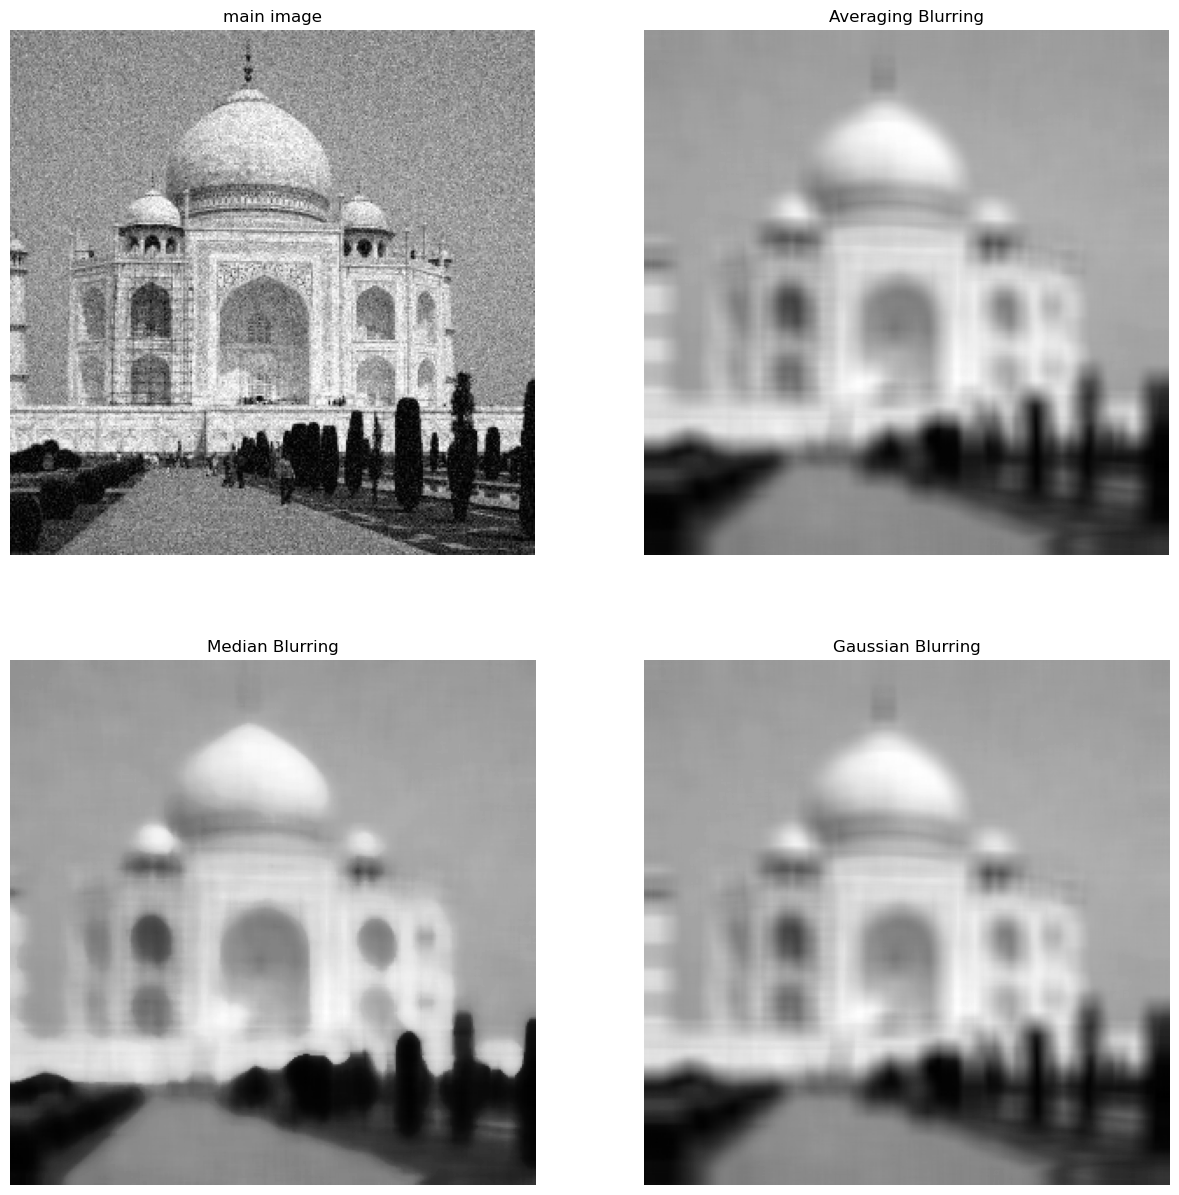

In [7]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [8]:

def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    # sources:
    # https://en.wikipedia.org/wiki/Bilateral_filter
    # https://www.geeksforgeeks.org/python-bilateral-filtering/
    # https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
    
    result = img.copy()
    #######################
    #    your code here   #
    img = np.float64(img)
    padded_image = Reflect101(img, filter_size)
    padded_image = np.float64(padded_image)
    img_width, img_height = img.shape
    filter_width, filter_height = filter_size, filter_size
    kernel_row_center = filter_width // 2
    kernel_col_center = filter_height // 2

    row_spatial_diff = np.square( np.arange(-kernel_row_center, kernel_row_center+1) )
    col_spatial_diff = np.square( np.arange(-kernel_col_center, kernel_col_center+1) )
    spatial_diff = row_spatial_diff[:, np.newaxis] + col_spatial_diff[np.newaxis, :]
    gaussian_spatial_diff = spatial_diff / (2 * std**2)

    for row in range(img_width):
      for col in range(img_height):
        window = padded_image[row:row+filter_width, col:col+filter_height]
        gaussian_range_diff = np.square(image[row, col] - window) / (2*rstd**2)
        # gaussian_range_diff = np.square(padded_image[row + kernel_row_center, col + kernel_col_center] - padded_image[row:row+filter_width, col:col+filter_height])
        weights_kernel = np.exp(-gaussian_spatial_diff - gaussian_range_diff)
        weights_kernel /= weights_kernel.sum() 
        result[row, col] = np.sum(window * weights_kernel)
        # ---------------------------
        # weights_kernel = np.zeros((filter_width, filter_height))
        # for kernel_row in range(filter_width):
        #   for kernel_col in range(filter_height):
        #     t1 = -( ( (kernel_row_center - kernel_row)**2 + (kernel_col_center - kernel_col)**2 ) / (2*(std**2)) )
        #     t2 = -( ( (padded_image[row + kernel_row, col + kernel_col] - padded_image[row + kernel_row_center, col + kernel_col_center])**2 ) / (2*(rstd**2)) )
        #     weights_kernel[kernel_row, kernel_col] = np.exp(t1 + t2)
        # weights_kernel = weights_kernel / np.sum(weights_kernel)
        # result[row, col] = np.sum(weights_kernel * padded_image[row:row + filter_width, col:col + filter_height])
    #######################
    return result

<div dir="rtl">
    <p>
    فیلتر دوطرفه یک فیلتر صاف کننده غیرخطی، حفظ لبه و کاهش نویز برای تصاویر است. شدت هر پیکسل را با میانگین وزنی مقادیر شدت پیکسل های مجاور جایگزین می کند. این وزن می تواند بر اساس توزیع گاوسی باشد. مهم‌تر از همه، وزن‌ها نه تنها به فاصله اقلیدسی پیکسل‌ها، بلکه به تفاوت‌های رادیومتری (به عنوان مثال، تفاوت‌های محدوده، مانند شدت رنگ، فاصله عمق، و غیره) بستگی دارند. این باعث حفظ لبه های تیز می شود.
    </p>
    <h3>پارامتر ها </h3>
    <p>با افزایش پارامتر دامنه σr، فیلتر دو طرفه به تدریج به پیچیدگی گاوسی نزدیک‌تر می‌شود، زیرا محدوده گاوسی گسترده و مسطح می‌شود، به این معنی که در بازه شدت تصویر تقریباً ثابت می‌شود.
با افزایش پارامتر فضایی σd، ویژگی های بزرگتر صاف می شوند.
    </p>
    <h3>محدودیت ها </h3>
    <p>فیلتر دوطرفه در شکل مستقیم خود می تواند انواع مختلفی از مصنوعات تصویر را معرفی کند:

جلوه پلکان - فلات های شدت که منجر به ظاهر شدن تصاویر مانند کارتون می شود
معکوس گرادیان - معرفی لبه های کاذب در تصویر.
چندین افزونه برای فیلتر وجود دارد که با این مصنوعات سروکار دارد، مانند فیلتر دوطرفه مقیاس‌پذیر که از تصویر کوچک‌شده برای محاسبه وزن‌ها استفاده می‌کند.فیلترهای جایگزین، مانند فیلتر هدایت شونده، نیز به عنوان یک جایگزین کارآمد بدون این محدودیت ها پیشنهاد شده اند.
    </p>
    <h3>مدل های مرتبط  </h3>
    <p>نشان داده شده است که فیلتر دوطرفه کاربرد هسته زمان کوتاه جریان بلترامی است که به عنوان مکانیزم صاف کردن انتخابی حفظ لبه قبل از فیلتر دوطرفه معرفی شده است.

سایر فیلترهای صاف کننده حفظ لبه عبارتند از: انتشار ناهمسانگرد،حداقل مربعات وزن،موجک های اجتناب از لبه،ویرایش ژئودزیک،فیلتر هدایت شده،فیلتر هدایت شونده تکراریو تبدیل دامنه
    </p>
</div>

(-0.5, 299.5, 299.5, -0.5)

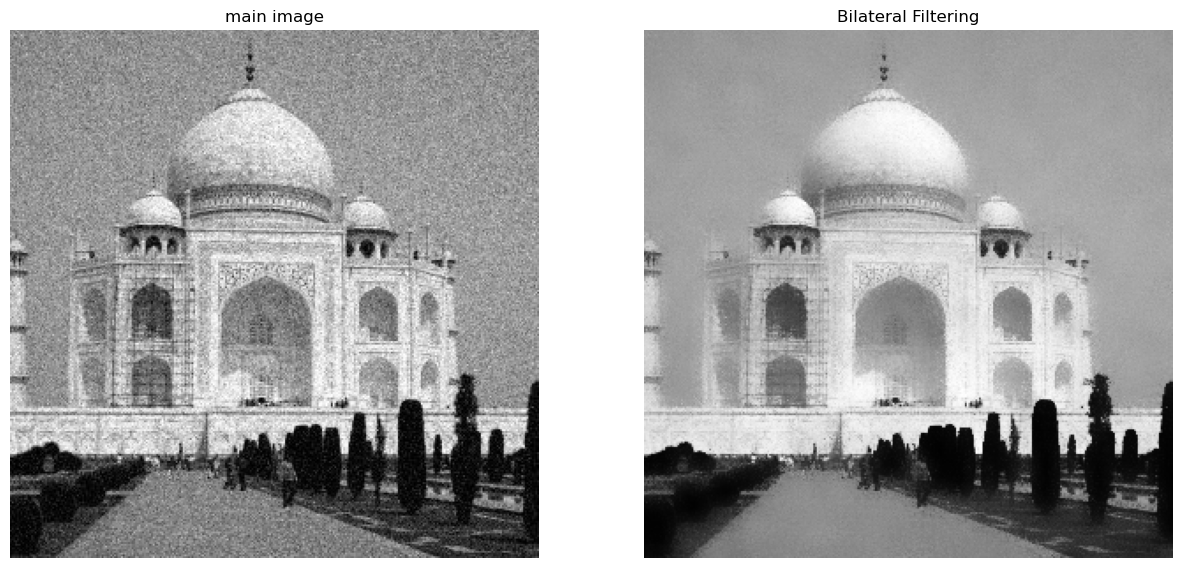

In [9]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
# cv2_imshow(bilateral)
cv2.imshow('image', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

# draw the original image and filtered image
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bilateral,cmap='gray')
plt.title("Bilateral Filtering")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [ ]:
# https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html
AveragingBlurring = cv2.blur(image, (15, 15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image, (15, 15), 40)
Bilateral = cv2.bilateralFilter(image, 15, 40, 40)

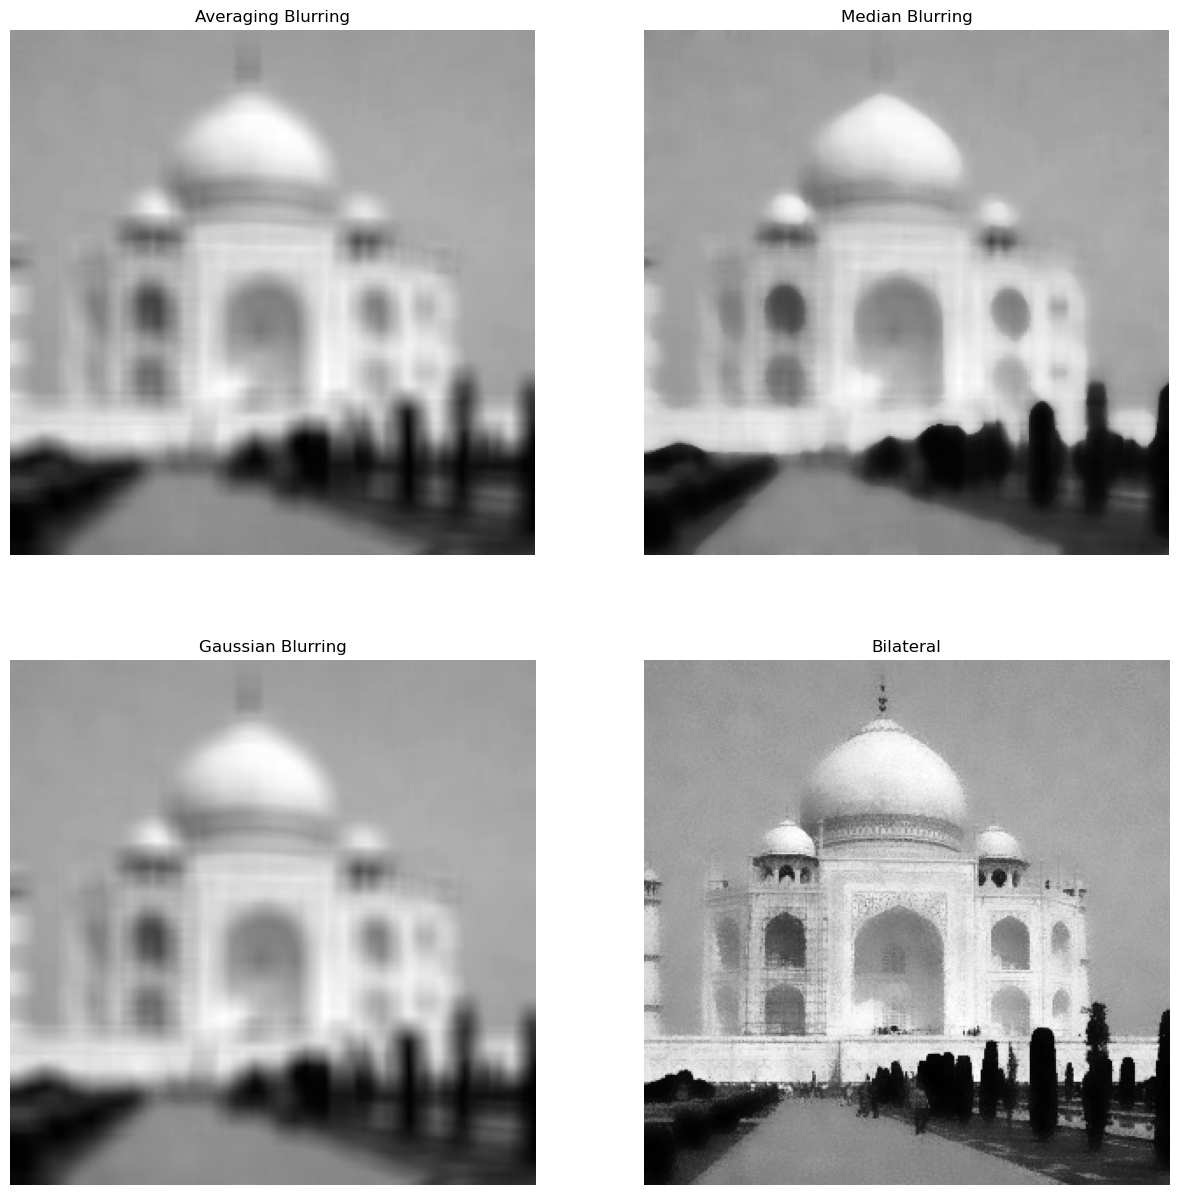

In [ ]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")

<div dir="rtl">
    نتایج کد من با کتابخانه opencv یکسان بود.
<div>